In [22]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

competitions = sb.competitions()
print(competitions[['competition_id', 'competition_name', 'season_name', 'season_id']].head())


   competition_id        competition_name season_name  season_id
0               9           1. Bundesliga   2023/2024        281
1               9           1. Bundesliga   2015/2016         27
2            1267  African Cup of Nations        2023        107
3              16        Champions League   2018/2019          4
4              16        Champions League   2017/2018          1


In [15]:
matches = sb.matches(competition_id=16, season_id=1)
print(matches[['match_id', 'home_team', 'away_team']].head())

   match_id    home_team  away_team
0     18245  Real Madrid  Liverpool


In [16]:
match_id = matches.loc[0, 'match_id']
print("Match ID selezionato:", match_id)

Match ID selezionato: 18245


In [17]:
events = sb.events(match_id=match_id)
print("Numero totale di eventi:", len(events))

Numero totale di eventi: 3497


In [50]:
team_name = 'Real Madrid'
player_name = 'Luka Modrić'
passes = events[(events['type'] == 'Pass') & (events['team'] == team_name) & (events['player'] == player_name)]
print("Numero di passaggi:", len(passes))

Numero di passaggi: 72


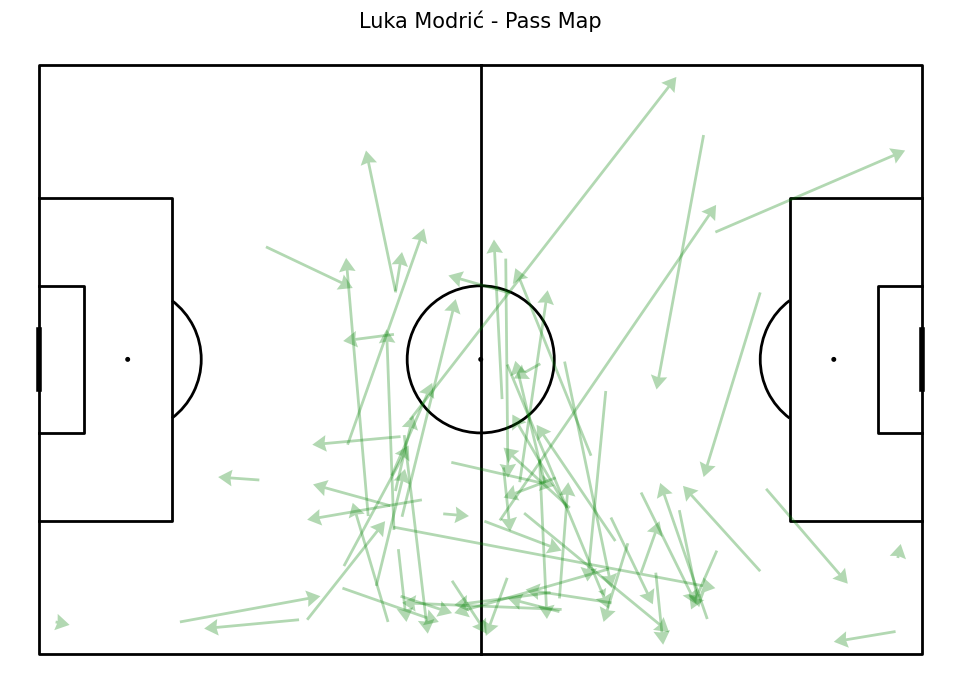

In [51]:
passes = passes.copy()
passes['x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
passes['y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

pitch = Pitch(line_color='black', pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(10, 7))
pitch.arrows(
    passes['x'], passes['y'], passes['end_x'], passes['end_y'],
    width=2, headwidth=6, color='green', ax=ax, alpha=0.3
)
ax.set_title(f"{player_name} - Pass Map", fontsize=15)
plt.show()

In [45]:
print(passes[['player', 'x', 'y', 'end_x', 'end_y']].head(10))

                            player     x     y  end_x  end_y
8                   Raphaël Varane  27.4  60.2   36.1   71.6
9                      Luka Modrić  35.3  75.4   22.4   76.6
10           Daniel Carvajal Ramos  22.3  76.6   33.4   68.0
11        Carlos Henrique Casimiro  36.2  75.3   43.6   62.0
16             Sergio Ramos García  14.7  23.2   56.7    6.2
17  Marcelo Vieira da Silva Júnior  57.5   4.6   49.2   15.6
18        Carlos Henrique Casimiro  48.8  18.4   49.8   12.5
19                      Toni Kroos  48.8  13.9   36.1   56.3
20                  Raphaël Varane  41.3  54.8   34.4   40.2
21             Sergio Ramos García  39.1  36.5   65.4   13.1


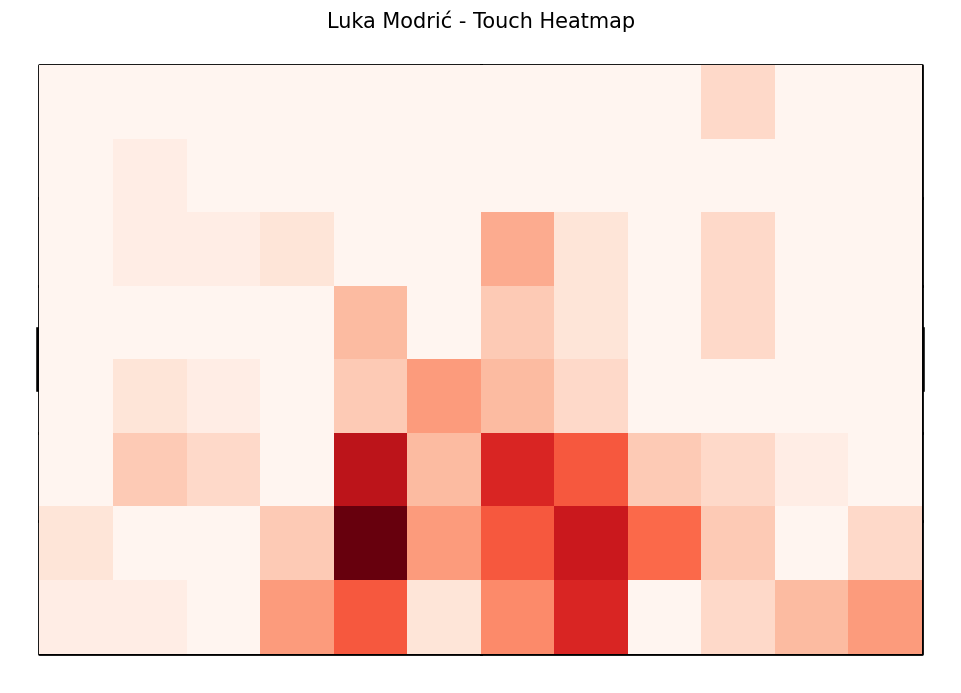

In [56]:
touches = events[events['player'] == player_name].copy()
touches['x'] = touches['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
touches['y'] = touches['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

fig, ax = pitch.draw(figsize=(10, 7))
bin_statistic = pitch.bin_statistic(
    touches['x'].dropna(), 
    touches['y'].dropna(), 
    statistic='count', 
    bins=(12, 8)
)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds')
ax.set_title(f"{player_name} - Touch Heatmap", fontsize=15)
plt.show()